In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
pd.set_option('max_columns', None)

# import csv file 
df_moviedetails = pd.read_csv('export_moviedetails_full_v2.csv', sep=',', encoding='iso-8859-1', escapechar='\\')

# drop duplicate record based movie_url
df_moviedetails.drop_duplicates(subset ="movie_url", keep = False, inplace = True) 

# metascore and world wide gross have lot of missing data, while user rating is complete
# transform the user rating column into GOOD and BAD where GOOD: (>6), BAD: (<=6) 
df_moviedetails['rating-enc'] = np.where(df_moviedetails['user_rating'] >6 , "GOOD", "BAD")


In [3]:
# concatenate movie title and plot summary 
df_moviedetails["title_plot"] = df_moviedetails["movie_title"].astype(str).str.cat(df_moviedetails["plot_summary"].astype(str), sep=' ')

In [4]:
# create dataframe df with subset of columns for text analytics
df = df_moviedetails[["movie_url","movie_title","title_plot","rating-enc"]]

# instead of the default index, extract imdb movie ID from url and set it as index
df["movie_id"] = df["movie_url"].str.split("/").str[-2]
df = df.set_index("movie_id")

# rename key columns' name
df = df.rename(columns={'title_plot': 'text','rating-enc': 'label'})

df.head()


C:\Users\ganfam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,movie_url,movie_title,text,label
movie_id,,,,
tt9016974,https://www.imdb.com/title/tt9016974/,Synchronic,Synchronic two new orleans paramedic life rip...,GOOD
tt4154796,https://www.imdb.com/title/tt4154796/,Avengers: Endgame,Avengers: Endgame after devastating event ofa...,GOOD
tt9608818,https://www.imdb.com/title/tt9608818/,The Friend,The Friend after receiving lifealtering news ...,GOOD
tt5363618,https://www.imdb.com/title/tt5363618/,Sound of Metal,Sound of Metal a heavymetal drummer life thro...,GOOD
tt8367814,https://www.imdb.com/title/tt8367814/,The Gentlemen,The Gentlemen an american expat try sell high...,GOOD


In [5]:
# check for null values in df
df.isnull().any()

movie_url      False
movie_title    False
text           False
label          False
dtype: bool

In [6]:
"""
text preprocessing - convert to lower case, remove non-word characters, remove spaces from the start
tokenization, then remove stop words. Then save the processed words back to text field.  
"""

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize

stop_words = stopwords.words('english')
newStopWords = ['his', 'like', "she'll", 'than', 'also', 'only', "you're", 'through', 'about', 'themselves', "aren't", 'above', 'after', "that's", 'before', 'com', 'she', "she's", "who's", 'has', 'any', "didn't", "i'd", "we've", 'the', 'other', 'else', 'at', 'down', "here's", 'further', 'there', 'these', 'by', 'get', "they'll", 'no', "where's", "shouldn't", 'then', 'himself', 'hers', 'out', "we'll", 'an', 'should', 'under', "let's", 'what', 'if', "isn't", "he'll", 'or', "shan't", 'too', 'same', 'this', "hasn't", "haven't", 'me', 'had', "they've", 'could', 'all', 'some', 'into', 'he', 'until', 'again', 'http', 'k', "hadn't", "couldn't", "i'll", "we'd", 'between', 'ourselves', "when's", 'for', 'doing', 'nor', 'which', 'our', 'was', 'such', 'very', 'own', 'on', 'being', 'am', 'yours', 'would', 'my', 'once', "they'd", 'how', 'to', 'more', 'theirs', 'did', 'when', "can't", 'www', 'does', 'those', 'both', "mustn't", 'ought', "weren't", 'were', 'therefore', 'here', 'over', 'with', 'it', 'not', "you've", "i'm", 'hence', 'against', "she'd", 'her', 'their', "it's", 'can', 'having', 'of', 'they', 'have', 'in', 'itself', 'just', 'from', "how's", 'i', 'we', 'and', 'shall', 'few', 'since', 'whom', 'while', 'you', 'be', 'yourself', "what's", "you'll", 'but', 'yourselves', 'below', 'herself', "i've", 'why', 'during', "he'd", 'who', 'off', 'otherwise', 'been', 'that', "you'd", 'myself', 'because', 'up', "we're", 'as', "wasn't", 'your', "there's", 'him', 'a', 'ours', 'r', 'ever', 'where', "they're", 'are', 'is', "he's", "don't", "doesn't", 'cannot', 'each', 'its', 'them', 'however', 'so', "why's", 'most', "wouldn't", "won't", 'do']
stop_words.extend(newStopWords)
lemmatizer = WordNetLemmatizer()

for index, row in df.iterrows():
    filter_sentence = ''
    sentence = str(row['text']).lower()
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words))
    
    df.loc[index, 'text'] = filter_sentence

df.head()

,movie_url,movie_title,text,label
movie_id,,,,
tt9016974,https://www.imdb.com/title/tt9016974/,Synchronic,synchronic two new orleans paramedic life rip...,GOOD
tt4154796,https://www.imdb.com/title/tt4154796/,Avengers: Endgame,avenger endgame devastating event ofavengers ...,GOOD
tt9608818,https://www.imdb.com/title/tt9608818/,The Friend,friend receiving lifealtering news couple fin...,GOOD
tt5363618,https://www.imdb.com/title/tt5363618/,Sound of Metal,sound metal heavymetal drummer life thrown fr...,GOOD
tt8367814,https://www.imdb.com/title/tt8367814/,The Gentlemen,gentleman american expat try sell highly prof...,GOOD


In [7]:
# filter df and generate GOOD and BAD movie datasets
df_good = df[df['label']=='GOOD']
df_bad = df[df['label']=='BAD']

In [8]:
"""
In this and next 2 cells, transform the GOOD and BAD movie datasets into Word2vec embeddings
"""

import gensim

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
embeddings = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [9]:
dog = embeddings['dog']
print(dog.shape)
print(dog[:10])

(300,)
[ 0.05126953 -0.02233887 -0.17285156  0.16113281 -0.08447266  0.05737305
  0.05859375 -0.08251953 -0.01538086 -0.06347656]


In [10]:
w2v_good = pd.DataFrame() # creating empty final dataframe
w2v_bad = pd.DataFrame()

for doc in df_good['text']: # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    w2v_good = w2v_good.append(doc_vector, ignore_index = True) # append each document value to the final dataframe

print(w2v_good.shape)


for doc in df_bad['text']: # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    w2v_bad = w2v_bad.append(doc_vector, ignore_index = True) # append each document value to the final dataframe

print(w2v_bad.shape)


(2650, 300)
(2349, 300)


In [11]:
#use K Means CLustering to cluster GOOD and BAD movies into 8 clusters/topics.


from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(w2v_good)
df_good_w2v = pd.DataFrame({'plot_keywords' :df_good.text, 'topic_cluster' :y_km })
print(df_good_w2v.head())


y_km = km.fit_predict(w2v_bad)
df_bad_w2v = pd.DataFrame({'plot_keywords' :df_bad.text, 'topic_cluster' :y_km })
print(df_bad_w2v.head())

                                               plot_keywords  topic_cluster
movie_id                                                                   
tt9016974   synchronic two new orleans paramedic life rip...              3
tt4154796   avenger endgame devastating event ofavengers ...              3
tt9608818   friend receiving lifealtering news couple fin...              2
tt5363618   sound metal heavymetal drummer life thrown fr...              2
tt8367814   gentleman american expat try sell highly prof...              0
                                                plot_keywords  topic_cluster
movie_id                                                                    
tt10195452   american skin marine veteran working school j...              3
tt4126476    young woman fall guy dark secret two embark r...              1
tt3741700    godzilla king monster cryptozoological agency...              0
tt5697572    cat tribe cat called jellicles must decide ye...              6
tt6565

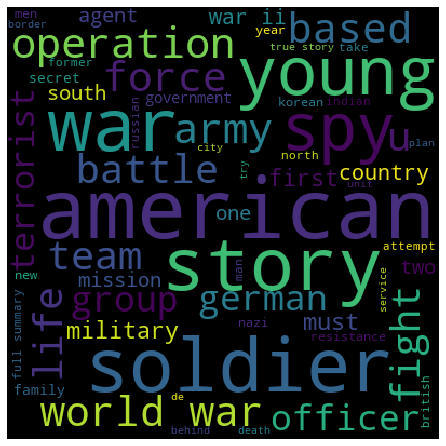

{'war': 56, 'story': 30, 'american': 29, 'soldier': 23, 'world': 21, 'young': 18, 'south': 17, 'terrorist': 17, 'spy': 16, 'operation': 16, 'agent': 16, 'army': 16, 'force': 15, 'based': 15, 'life': 14, 'team': 14, 'u': 14, 'battle': 14, 'fight': 14, 'ii': 14}


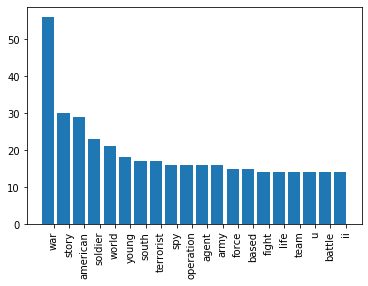

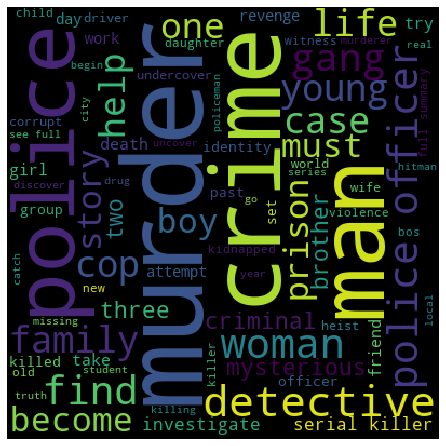

{'police': 46, 'murder': 46, 'crime': 34, 'officer': 31, 'man': 30, 'woman': 27, 'detective': 23, 'young': 23, 'killer': 21, 'find': 20, 'gang': 19, 'family': 17, 'life': 17, 'cop': 17, 'case': 17, 'one': 16, 'revenge': 16, 'help': 16, 'prison': 15, 'boy': 14}


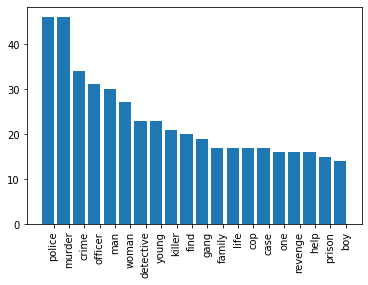

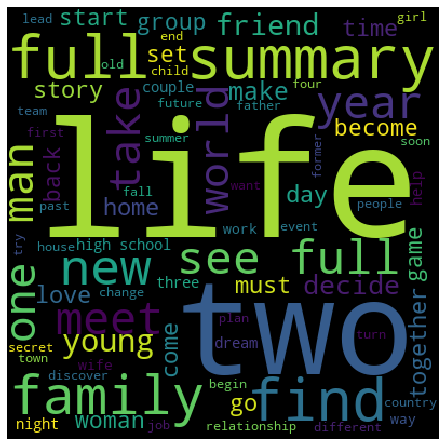

{'life': 114, 'two': 81, 'year': 77, 'full': 73, 'summary': 69, 'find': 66, 'family': 66, 'new': 64, 'see': 61, 'take': 59, 'one': 59, 'friend': 57, 'young': 55, 'meet': 54, 'man': 51, 'world': 48, 'school': 46, 'love': 43, 'day': 36, 'woman': 34}


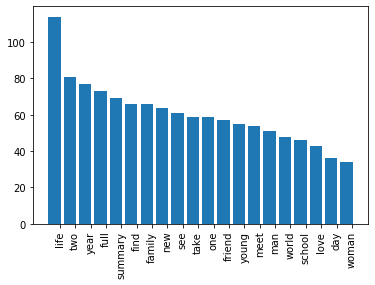

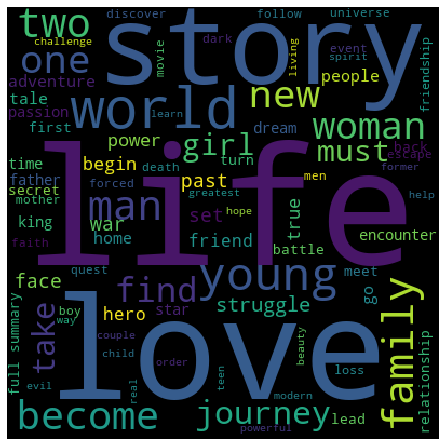

{'life': 90, 'story': 71, 'love': 71, 'young': 50, 'world': 41, 'family': 32, 'woman': 32, 'new': 30, 'two': 29, 'man': 29, 'one': 26, 'true': 23, 'find': 21, 'journey': 21, 'take': 20, 'must': 19, 'girl': 19, 'struggle': 19, 'war': 18, 'face': 18}


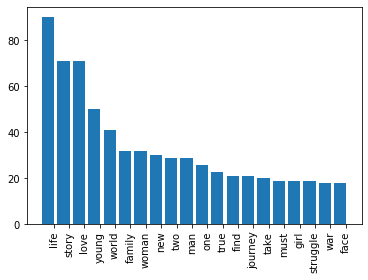

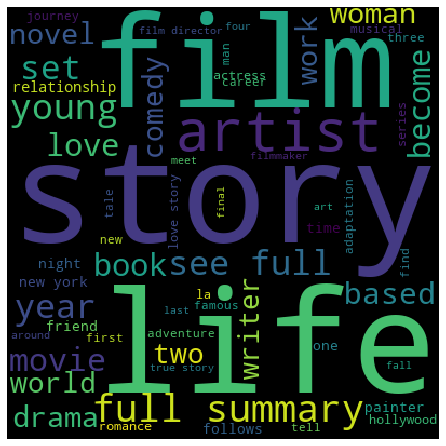

{'story': 61, 'life': 47, 'film': 42, 'love': 21, 'full': 20, 'summary': 19, 'artist': 19, 'see': 18, 'young': 17, 'year': 16, 'new': 16, 'set': 15, 'comedy': 14, 'movie': 14, 'book': 13, 'based': 12, 'work': 11, 'woman': 11, 'drama': 11, 'novel': 11}


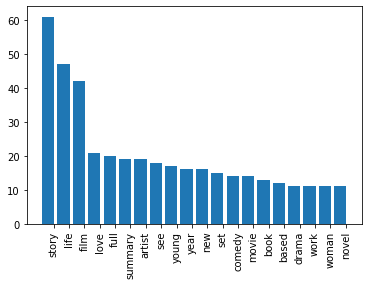

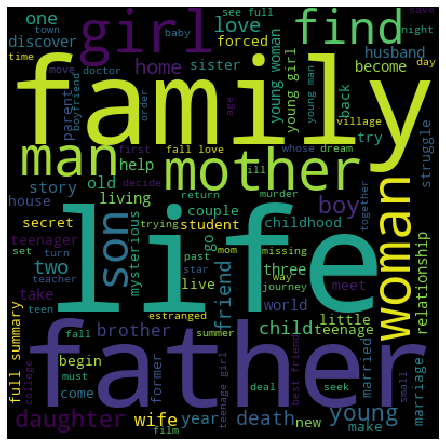

{'young': 103, 'girl': 103, 'life': 95, 'family': 92, 'father': 84, 'woman': 83, 'man': 77, 'mother': 74, 'boy': 65, 'find': 61, 'son': 58, 'daughter': 57, 'love': 56, 'friend': 54, 'home': 44, 'two': 41, 'year': 40, 'teenage': 38, 'brother': 35, 'old': 34}


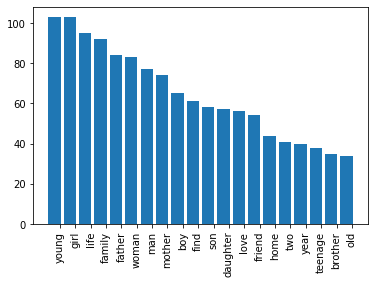

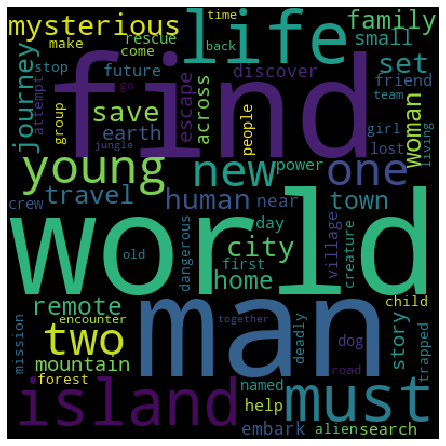

{'world': 28, 'man': 28, 'find': 27, 'life': 26, 'new': 23, 'island': 21, 'must': 21, 'young': 20, 'two': 18, 'one': 18, 'mysterious': 17, 'set': 17, 'home': 17, 'human': 16, 'save': 16, 'city': 16, 'journey': 15, 'travel': 14, 'woman': 14, 'remote': 13}


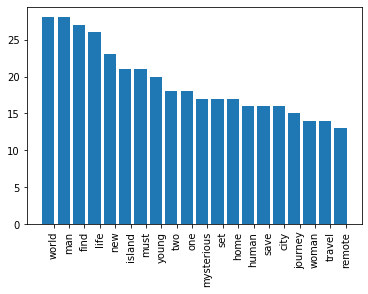

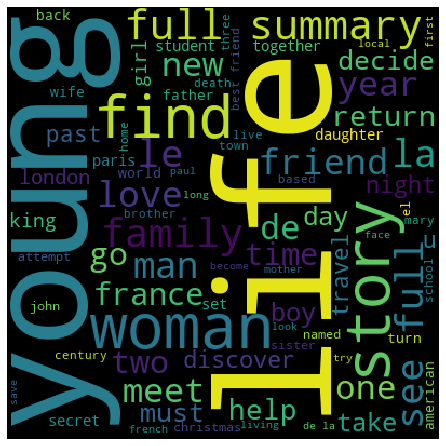

{'life': 56, 'young': 44, 'story': 43, 'woman': 38, 'la': 37, 'friend': 35, 'full': 35, 'find': 34, 'summary': 33, 'de': 32, 'love': 32, 'see': 32, 'family': 31, 'new': 30, 'le': 29, 'year': 29, 'man': 26, 'meet': 24, 'one': 23, 'two': 21}


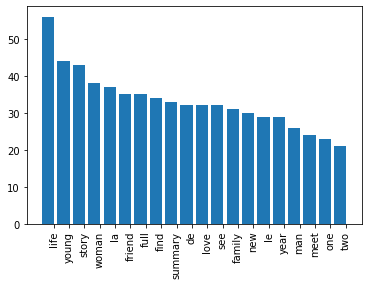

In [12]:
"""
topic modeling is a BoW model. 
Looping thru each cluseter/topics in GOOD and BAD movie datasets, split plot summaries into a list of keywords, 
then build the world clouds and histograms.
"""


%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

stop_words = set(STOPWORDS)

for cluster_index in range(0,8):

    key_words_good = ""

    for index, row in df_good_w2v.iterrows():
        if row['topic_cluster'] == cluster_index:
            separate = row['plot_keywords'].split(" ") 
            for j in range(len(separate)): 
                separate[j] = separate[j].strip().lower()     
            key_words_good += " ".join(separate)+" "
    
    #print(key_words_good)
        
    # Creating the Word Cloud
    final_wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='black', 
                    stopwords = stop_words, 
                    min_font_size = 10).generate(key_words_good)

    # Displaying the WordCloud                    
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(final_wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()
    
 
    word_list = key_words_good.split()
    counts = dict(Counter(word_list).most_common(20))
    print(counts)

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels, rotation='vertical')
    
    plt.show()


{'war': 56, 'story': 30, 'american': 29, 'soldier': 23, 'world': 21, 'young': 18, 'south': 17, 'terrorist': 17, 'spy': 16, 'operation': 16, 'agent': 16, 'army': 16, 'force': 15, 'based': 15, 'life': 14, 'team': 14, 'u': 14, 'battle': 14, 'fight': 14, 'ii': 14, 'german': 14, 'group': 14, 'officer': 14, 'korean': 14, 'true': 13, 'military': 13, 'north': 13, 'first': 13, 'must': 13, 'country': 13, 'two': 12, 'one': 12, 'mission': 12, 'government': 12, 'secret': 11, 'full': 11, 'cia': 11, 'family': 11, 'korea': 11, 'men': 10, 'attack': 10, 'nazi': 10, 'year': 10, 'resistance': 10, 'attempt': 9, 'former': 9, 'take': 9, 'drug': 9, 'british': 9, 'new': 9, 'man': 9, 'indian': 9, 'summary': 9, 'russian': 9, 'try': 8, 'iraq': 8, 'unit': 8, 'city': 8, 'death': 8, 'service': 8, 'border': 8, 'behind': 8, 'de': 8, 'plan': 8, 'security': 7, 'member': 7, 'woman': 7, 'nation': 7, 'see': 7, 'hostage': 7, 'power': 7, 'president': 7, 'civil': 7, 'becomes': 6, 'small': 6, 'fighter': 6, 'last': 6, 'lead': 6

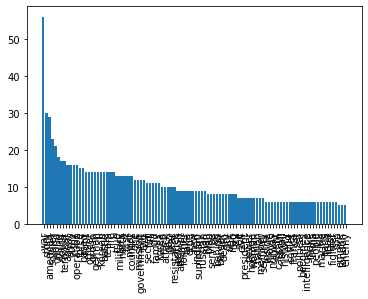

In [13]:
for cluster_index in range(0,1):

    key_words_good = ""

    for index, row in df_good_w2v.iterrows():
        if row['topic_cluster'] == cluster_index:
            separate = row['plot_keywords'].split(" ") 
            for j in range(len(separate)): 
                separate[j] = separate[j].strip().lower()     
            key_words_good += " ".join(separate)+" "
        
 
    word_list = key_words_good.split()
    counts = dict(Counter(word_list).most_common(100))
    print(counts)

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels, rotation='vertical')
    
    
    plt.show()


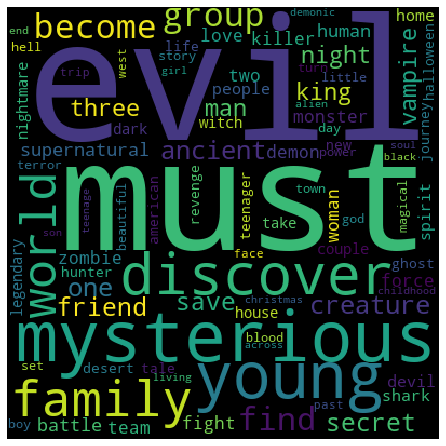

{'evil': 29, 'young': 27, 'must': 24, 'mysterious': 22, 'family': 18, 'friend': 18, 'world': 17, 'group': 17, 'woman': 17, 'find': 16, 'ancient': 15, 'one': 15, 'creature': 15, 'save': 14, 'fight': 14, 'secret': 14, 'king': 13, 'night': 13, 'three': 13, 'man': 13}


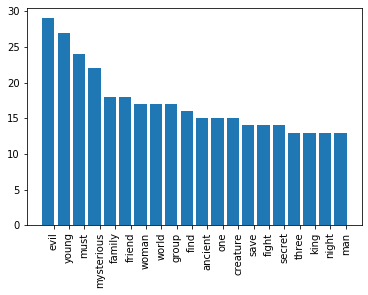

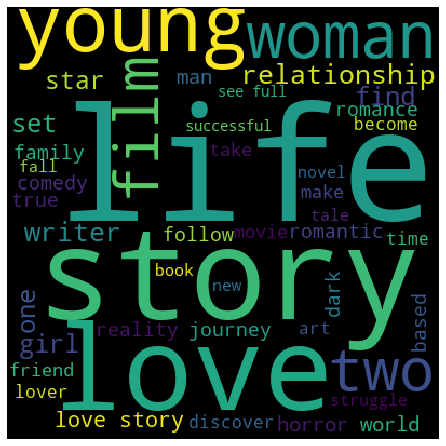

{'life': 63, 'love': 55, 'story': 55, 'young': 27, 'woman': 21, 'film': 19, 'two': 18, 'relationship': 17, 'writer': 17, 'one': 16, 'set': 16, 'find': 16, 'girl': 16, 'fall': 15, 'star': 15, 'friend': 14, 'world': 13, 'horror': 13, 'man': 13, 'new': 13}


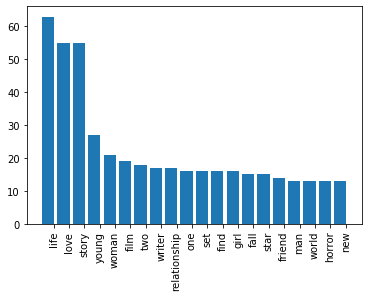

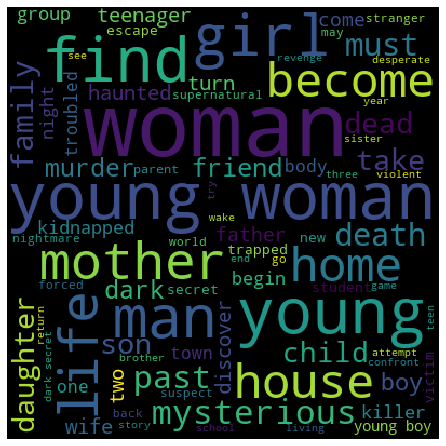

{'young': 104, 'woman': 96, 'girl': 43, 'find': 43, 'man': 38, 'mother': 34, 'life': 32, 'boy': 25, 'home': 24, 'house': 24, 'dark': 23, 'mysterious': 23, 'past': 21, 'must': 20, 'death': 20, 'school': 19, 'family': 19, 'secret': 18, 'murder': 18, 'daughter': 17}


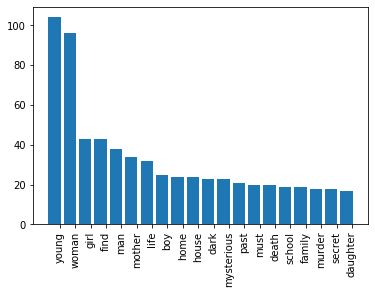

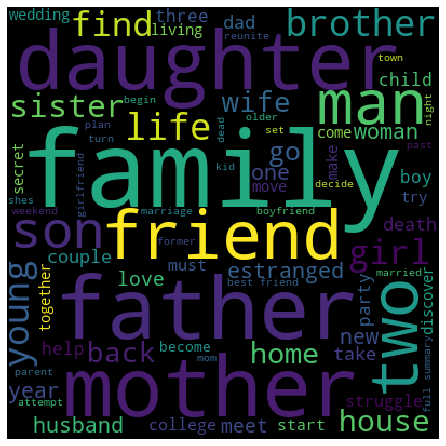

{'family': 74, 'friend': 51, 'mother': 50, 'father': 46, 'daughter': 42, 'young': 41, 'two': 41, 'man': 38, 'son': 36, 'brother': 35, 'life': 34, 'year': 34, 'home': 33, 'woman': 32, 'find': 30, 'girl': 30, 'sister': 30, 'go': 27, 'house': 27, 'one': 27}


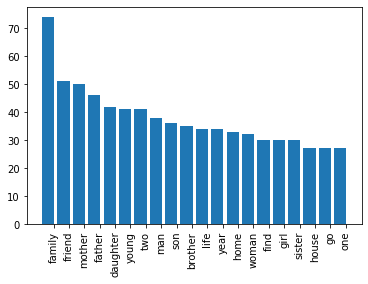

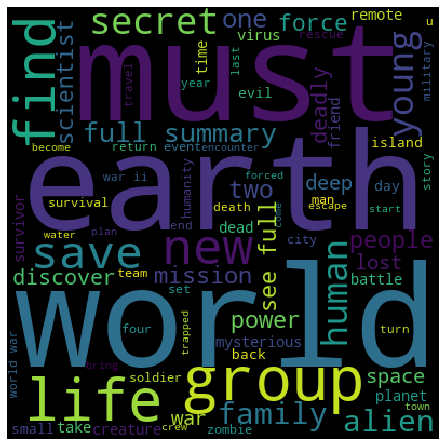

{'world': 52, 'must': 47, 'earth': 40, 'group': 36, 'life': 34, 'war': 34, 'find': 30, 'save': 25, 'new': 24, 'human': 23, 'two': 22, 'fight': 21, 'secret': 21, 'young': 20, 'family': 20, 'alien': 20, 'full': 20, 'summary': 20, 'see': 19, 'one': 19}


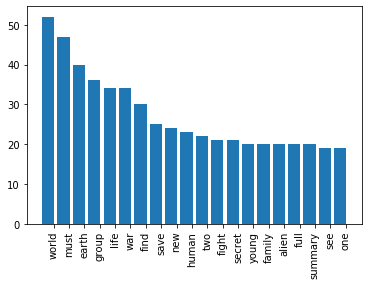

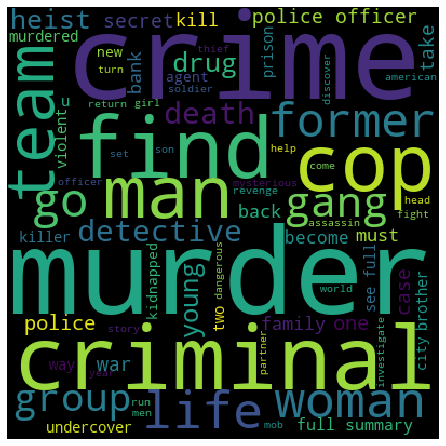

{'murder': 33, 'crime': 33, 'criminal': 32, 'police': 31, 'find': 28, 'cop': 25, 'drug': 25, 'man': 24, 'officer': 24, 'team': 20, 'detective': 20, 'life': 19, 'woman': 19, 'former': 19, 'go': 19, 'agent': 18, 'gang': 18, 'group': 17, 'death': 17, 'heist': 17}


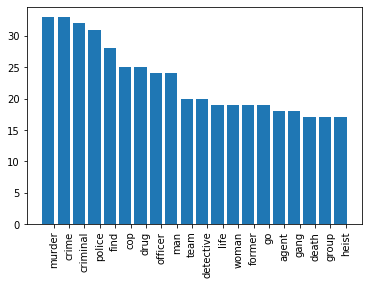

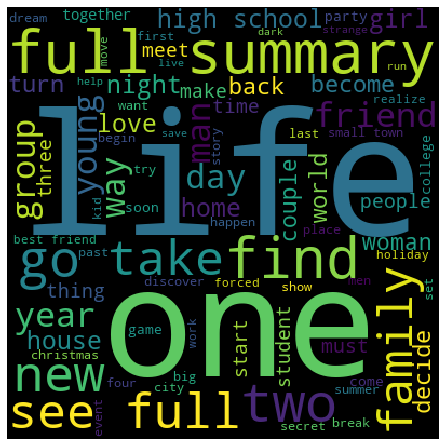

{'life': 92, 'one': 79, 'full': 73, 'summary': 71, 'find': 64, 'friend': 64, 'go': 64, 'young': 63, 'see': 61, 'two': 59, 'new': 58, 'school': 58, 'year': 53, 'take': 50, 'family': 48, 'group': 46, 'woman': 41, 'high': 40, 'man': 40, 'day': 38}


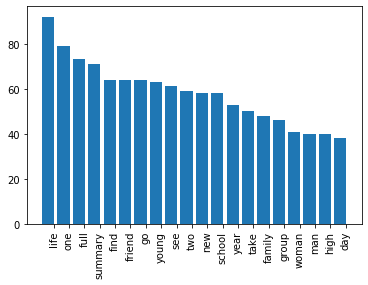

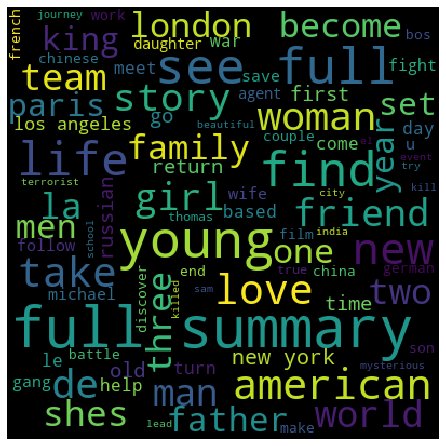

{'full': 40, 'summary': 40, 'young': 34, 'see': 34, 'new': 30, 'find': 29, 'life': 26, 'love': 26, 'story': 23, 'friend': 21, 'american': 21, 'take': 20, 'la': 19, 'woman': 19, 'de': 19, 'girl': 17, 'man': 16, 'team': 16, 'world': 16, 'two': 15}


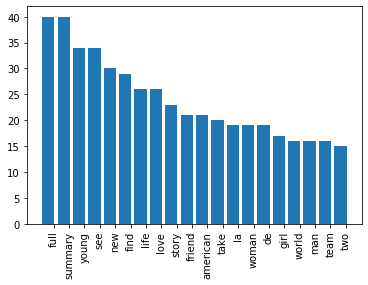

In [14]:


for cluster_index in range(0,8):

    key_words_bad = ""

    for index, row in df_bad_w2v.iterrows():
        if row['topic_cluster'] == cluster_index:
            separate = row['plot_keywords'].split(" ") 
            for j in range(len(separate)): 
                separate[j] = separate[j].strip().lower()     
            key_words_bad += " ".join(separate)+" "
    
    #print(key_words_bad)
        
    # Creating the Word Cloud
    final_wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='black', 
                    stopwords = stop_words, 
                    min_font_size = 10).generate(key_words_bad)

    # Displaying the WordCloud                    
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(final_wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()
    
 
    word_list = key_words_bad.split()
    counts = dict(Counter(word_list).most_common(20))
    print(counts)

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels, rotation='vertical')
    
    plt.show()


In [15]:
"""
Below using gensim ldamodel for topic modeling 
"""

import gensim
from gensim import corpora
import string
from pathlib import Path
from pprint import pprint

In [16]:
doc_good = [doc.split() for doc in df_good["text"] ]

dictionary = corpora.Dictionary(doc_good)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_good]

In [17]:
'''
Create lda model for GOOD movies' plot keywords with BoW and TFIDF
'''
topic_num = 8
word_num = 40
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary,passes=20)


for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

#pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))

# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Topic: 0 
Words: 0.006*"family" + 0.006*"two" + 0.005*"life" + 0.005*"new" + 0.004*"love" + 0.004*"set" + 0.004*"son" + 0.004*"one" + 0.004*"day" + 0.003*"man"
Topic: 1 
Words: 0.006*"story" + 0.004*"friend" + 0.004*"go" + 0.004*"love" + 0.004*"world" + 0.004*"city" + 0.003*"turn" + 0.003*"man" + 0.003*"trip" + 0.003*"de"
Topic: 2 
Words: 0.010*"life" + 0.006*"story" + 0.005*"young" + 0.005*"school" + 0.005*"love" + 0.004*"set" + 0.004*"part" + 0.004*"high" + 0.004*"couple" + 0.004*"girl"
Topic: 3 
Words: 0.012*"friend" + 0.010*"life" + 0.006*"woman" + 0.006*"world" + 0.006*"two" + 0.006*"new" + 0.006*"find" + 0.005*"love" + 0.005*"man" + 0.004*"one"
Topic: 4 
Words: 0.011*"life" + 0.008*"story" + 0.008*"family" + 0.007*"girl" + 0.007*"love" + 0.006*"find" + 0.006*"young" + 0.006*"man" + 0.005*"two" + 0.005*"world"
Topic: 5 
Words: 0.019*"full" + 0.018*"summary" + 0.015*"see" + 0.007*"year" + 0.006*"take" + 0.005*"family" + 0.005*"life" + 0.004*"old" + 0.004*"man" + 0.004*"town"
Topic:

In [19]:
doc_good = [doc.split() for doc in df_good["text"] ]
dictionary = gensim.corpora.Dictionary(doc_good)
bow_corpus = [dictionary.doc2bow(doc) for doc in doc_good]

tfidf = gensim.models.TfidfModel(bow_corpus)

corpus_tfidf = tfidf[bow_corpus]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"life" + 0.007*"story" + 0.006*"two" + 0.006*"girl" + 0.005*"woman" + 0.004*"school" + 0.004*"one" + 0.004*"friend" + 0.004*"year" + 0.003*"new"
Topic: 1 
Words: 0.007*"life" + 0.006*"woman" + 0.006*"young" + 0.006*"man" + 0.005*"world" + 0.005*"friend" + 0.005*"find" + 0.005*"girl" + 0.004*"new" + 0.004*"take"
Topic: 2 
Words: 0.006*"war" + 0.005*"story" + 0.005*"woman" + 0.005*"two" + 0.004*"world" + 0.004*"friend" + 0.004*"one" + 0.003*"love" + 0.003*"young" + 0.003*"full"
Topic: 3 
Words: 0.007*"life" + 0.007*"love" + 0.006*"full" + 0.006*"summary" + 0.005*"see" + 0.005*"story" + 0.005*"take" + 0.005*"find" + 0.004*"meet" + 0.004*"family"
Topic: 4 
Words: 0.010*"young" + 0.010*"family" + 0.009*"life" + 0.007*"man" + 0.006*"story" + 0.005*"one" + 0.005*"woman" + 0.004*"two" + 0.004*"home" + 0.004*"find"
Topic: 5 
Words: 0.013*"life" + 0.008*"young" + 0.006*"love" + 0.006*"family" + 0.005*"full" + 0.005*"man" + 0.005*"summary" + 0.005*"find" + 0.005*"father" + 

In [20]:
'''
Visualize topics and keywords
'''
# plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\ganfam\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.091239 -0.010656       1        1  17.726398
4     -0.069170  0.012010       2        1  16.077665
6      0.047632 -0.060742       3        1  14.118741
3     -0.067480  0.102481       4        1  12.048374
2     -0.040971  0.065891       5        1  11.442616
5     -0.010167 -0.163826       6        1  10.195001
0      0.065204 -0.015713       7        1   9.522273
1      0.166190  0.070556       8        1   8.868931, topic_info=     Category        Freq     Term       Total  loglift  logprob
1261  Default  164.000000     full  164.000000  30.0000  30.0000
1896  Default  151.000000  summary  151.000000  29.0000  29.0000
670   Default  142.000000      see  142.000000  28.0000  28.0000
43    Default  178.000000   friend  178.000000  27.0000  27.0000
210   Default  110.000000      boy  110.000000  26.0000  26.0000
...       ...         ...      ...         ...      ...      ...
168    Topic8    9.362350  becomes   56.425148   0.6264  -6.1044
8      Topic8   10.741482     life  355.941315  -1.0780  -5.9670
178    Topic8    9.784664      one  151.352951  -0.3162  -6.0603
218    Topic8   10.076204    young  260.341614  -0.8292  -6.0310
311    Topic8    8.900374     must   95.751717   0.0470  -6.1550

[617 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5498      2  0.953525    100
7676      3  0.922774     13
1461      6  0.921693     15
7119      7  0.233651     17
7119      8  0.700954     17
...     ...       ...    ...
218       5  0.111392  young
218       6  0.034570  young
218       7  0.053775  young
218       8  0.038411  young
9344      8  0.904617      z

[1245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 7, 4, 3, 6, 1, 2])

In [21]:
doc_bad = [doc.split() for doc in df_bad["text"] ]

dictionary = corpora.Dictionary(doc_bad)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_bad]

In [22]:
'''
Create lda model for BAD movies' plot keywords
'''
topic_num = 8
word_num = 20
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary,passes=20)
pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))

# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

[(0,
  '0.009*"young" + 0.008*"war" + 0.007*"find" + 0.005*"woman" + 0.004*"escape" '
  '+ 0.004*"girl" + 0.004*"love" + 0.004*"two" + 0.004*"take" + 0.004*"school" '
  '+ 0.004*"world" + 0.004*"go" + 0.004*"way" + 0.003*"city" + 0.003*"life" + '
  '0.003*"u" + 0.003*"border" + 0.003*"group" + 0.003*"people" + '
  '0.003*"husband"'),
 (1,
  '0.014*"full" + 0.013*"summary" + 0.011*"see" + 0.008*"man" + 0.007*"life" + '
  '0.007*"family" + 0.007*"young" + 0.006*"fight" + 0.006*"world" + '
  '0.006*"find" + 0.005*"group" + 0.005*"must" + 0.005*"forced" + '
  '0.005*"small" + 0.004*"year" + 0.004*"save" + 0.004*"home" + 0.004*"old" + '
  '0.004*"one" + 0.004*"friend"'),
 (2,
  '0.008*"summary" + 0.008*"full" + 0.007*"girl" + 0.007*"world" + '
  '0.006*"life" + 0.006*"see" + 0.006*"killer" + 0.005*"group" + '
  '0.005*"friend" + 0.005*"two" + 0.004*"love" + 0.004*"must" + 0.004*"family" '
  '+ 0.004*"new" + 0.004*"woman" + 0.004*"story" + 0.004*"small" + '
  '0.004*"night" + 0.004*"find" + 

In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\ganfam\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.077075  0.007799       1        1  14.689641
1     -0.040620  0.137089       2        1  14.530841
3     -0.020815 -0.173760       3        1  14.009907
4      0.007288  0.093767       4        1  13.388159
7     -0.058630 -0.059345       5        1  13.223103
2      0.003718  0.020726       6        1  12.189612
0     -0.051929 -0.015754       7        1  11.808722
5      0.238063 -0.010523       8        1   6.160015, topic_info=     Category        Freq       Term       Total  loglift  logprob
1105  Default  175.000000       full  175.000000  30.0000  30.0000
1110  Default  169.000000    summary  169.000000  29.0000  29.0000
1109  Default  152.000000        see  152.000000  28.0000  28.0000
926   Default   59.000000  christmas   59.000000  27.0000  27.0000
1395  Default   72.000000        war   72.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
1793   Topic8    7.065435        put   19.744991   1.7594  -5.8895
23     Topic8    7.221006      based   31.890057   1.3018  -5.8677
19     Topic8    7.740507        try   64.105293   0.6730  -5.7983
1180   Topic8    7.023118    student   56.325695   0.7051  -5.8955
705    Topic8    6.593250   criminal   35.580978   1.1013  -5.9587

[563 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
8316      6  0.852761     17yearold
6087      8  0.934653             9
504       1  0.743129  accidentally
504       4  0.039112  accidentally
504       5  0.039112  accidentally
...     ...       ...           ...
35        6  0.059549         young
35        7  0.147120         young
124       2  0.205126        zombie
124       3  0.246152        zombie
124       7  0.492303        zombie

[1065 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 4, 5, 8, 3, 1, 6])

# INGNORE THE FOLLOWING CELLS.

In [ ]:
from operator import itemgetter
import heapq
import collections

def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))

In [ ]:
for cluster_index in range(0,8):

    key_words_good = ""

    for index, row in df_good_w2v.iterrows():
        if row['topic_cluster'] == cluster_index:
            separate = row['plot_keywords'].split(" ") 
            for j in range(len(separate)): 
                separate[j] = separate[j].strip().lower()     
            key_words_good += " ".join(separate)+" "
    
  
 
    word_list = key_words_good.split()
    counts = dict(least_common_values(word_list, 10))
    print(counts)

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels, rotation='vertical')
    
    plt.show()
